In [544]:
#importing libraries
import pandas as pd
import numpy as np

In [545]:
#loading the data
train_df = pd.read_csv("train.csv") 
test_df= pd.read_csv("test.csv")

In [546]:
#Display shape
train_df.shape


(891, 12)

In [547]:
test_df.shape

(418, 11)

In [548]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [549]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [550]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [551]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [552]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data Cleaning

In [553]:
#Removing coloums we not using
train= train_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [554]:
test= test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)
test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


## Data Exploration

In [555]:
import seaborn as sns
sns.set_style('whitegrid')

In [556]:
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets

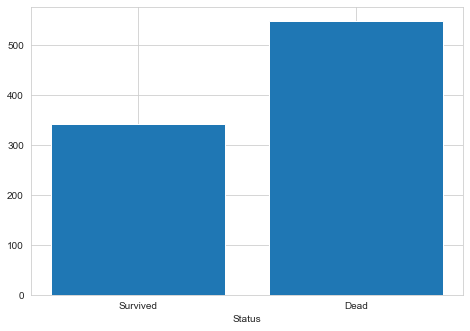

In [557]:
#Survived vs dead 

alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

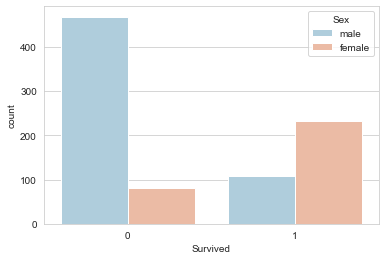

In [558]:
# Gender wise survived and dead
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

(-1.1200496328896363,
 1.1067439462436819,
 -1.1192695585191235,
 1.1009175980247201)

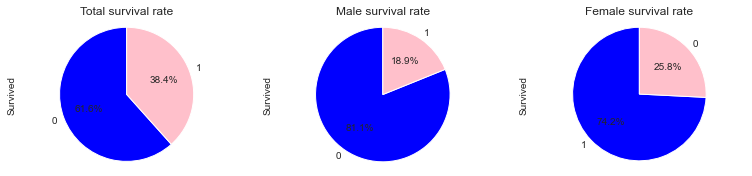

In [559]:
plt.figure(figsize=(13,6))
plot_params = {
    'kind': 'pie',
    'startangle': 90,
    'autopct': '%1.1f%%',
    'colors': ['blue', 'pink']
}


# Plots a bar graph of those who surived vs those who did not
plt.subplot2grid((2,3), (0,0))
train.Survived.value_counts() \
.plot(title='Total survival rate', **plot_params).axis('equal')


# Survival rate wrt Sex
df_male = train.Survived[train.Sex == 'male'].value_counts(normalize=True, sort=False)
df_female = train.Survived[train.Sex == 'female'].value_counts(normalize=True, sort=False)

## male survival plot
plt.subplot2grid((2,3),(0,1))
df_male.plot(title='Male survival rate', **plot_params).axis('equal')

## female survival plot
plt.subplot2grid((2,3),(0,2))
df_female.plot(title='Female survival rate', **plot_params).axis('equal')

<AxesSubplot:xlabel='Survived', ylabel='count'>

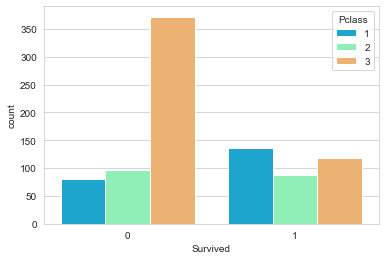

In [560]:
# According to the class they were travelling
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

([<matplotlib.axis.XTick at 0x230e8117190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

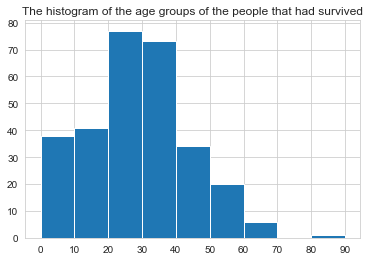

In [561]:
# Survived vs age group
plt.figure()
age  = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

<AxesSubplot:>

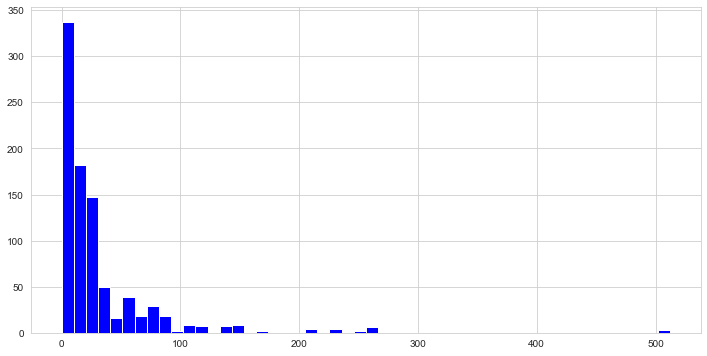

In [562]:
train['Fare'].hist(color='blue', bins=50, figsize=(12, 6))

<AxesSubplot:>

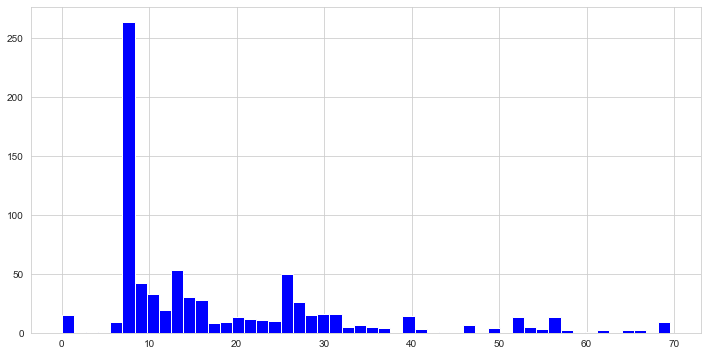

In [563]:
#observing more by zooming in

train[train['Fare']<70]['Fare'].hist(color='blue', bins=50, figsize=(12, 6))

In [564]:
test.describe(include="all")

,Pclass,Sex,Age,Fare,Embarked
count,418.000000,418,332.000000,417.000000,418
unique,NaN,2,NaN,NaN,3
top,NaN,male,NaN,NaN,S
freq,NaN,266,NaN,NaN,270
mean,2.265550,NaN,30.272590,35.627188,NaN
std,0.841838,NaN,14.181209,55.907576,NaN
min,1.000000,NaN,0.170000,0.000000,NaN
25%,1.000000,NaN,21.000000,7.895800,NaN
50%,3.000000,NaN,27.000000,14.454200,NaN
75%,3.000000,NaN,39.000000,31.500000,NaN


###### We can see some values are missing. Let's try findind relation between parameters

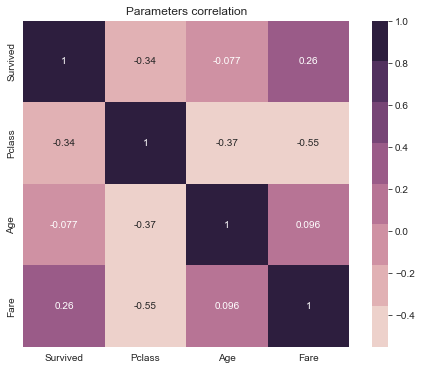

In [565]:
#Correlation between parameteres
fig = plt.figure(figsize=(8,6))
train['Pclass'] = pd.to_numeric(train['Pclass']) # hack for seaborn to process categorical data

cov_matrix = train.corr(method='pearson')
sns.heatmap(cov_matrix, square=True, annot=True, cmap=sns.cubehelix_palette(8)) \
.set_title('Parameters correlation');

### Checking the empty colums

In [566]:
# checking in train dataset
train.isnull().values.any()

True

In [567]:
train.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
Fare        False
Embarked     True
dtype: bool

In [568]:
#number of missing values in train dataset
train.isnull().sum().sum()

179

In [569]:
#checking in test dataset
test.isnull().values.any()

True

In [570]:
test.isna().any()

Pclass      False
Sex         False
Age          True
Fare         True
Embarked    False
dtype: bool

In [571]:
#number of missing values in test dataset
test.isnull().sum().sum()

87

### Filling the missing values

In [572]:
import math
median_age = math.floor(train.Age.median())
median_age

28

In [573]:
train.Age=train.Age.fillna(median_age)
test.Age= test.Age.fillna(median_age)

### Converting dtype

In [574]:
train['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
test["Sex"].replace(['female','male'],[0,1],inplace= True)

In [575]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,S
1,1,1,1,38.0,71.2833,C
2,1,3,1,26.0,7.9250,S
3,1,1,1,35.0,53.1000,S
4,0,3,0,35.0,8.0500,S


In [576]:
test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.5,7.8292,Q
1,3,0,47.0,7.0000,S
2,2,1,62.0,9.6875,Q
3,3,1,27.0,8.6625,S
4,3,0,22.0,12.2875,S


In [577]:
train['Embarked'] = train_df['Embarked'].fillna(method ='pad')
train['Embarked'].isnull().sum()

0

In [578]:
e={'C':0, 'Q':1 ,'S':2}
train['Embarked']=train['Embarked'].apply(lambda x:e[x])
train['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [579]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,2
1,1,1,1,38.0,71.2833,0
2,1,3,1,26.0,7.9250,2
3,1,1,1,35.0,53.1000,2
4,0,3,0,35.0,8.0500,2


In [580]:
test['Embarked'] = train_df['Embarked'].fillna(method ='pad')
test['Embarked'].isnull().sum()

0

In [581]:
e={'C':0, 'Q':1 ,'S':2}
test['Embarked']=test['Embarked'].apply(lambda x:e[x])
test['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [582]:
test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.5,7.8292,2
1,3,0,47.0,7.0000,0
2,2,1,62.0,9.6875,2
3,3,1,27.0,8.6625,2
4,3,0,22.0,12.2875,2


In [583]:
train.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
Embarked    False
dtype: bool

In [584]:
test.isna().any()

Pclass      False
Sex         False
Age         False
Fare         True
Embarked    False
dtype: bool

##### Now we can see no empty columns remain left in both the test and train data, and all data has been converted to bool

## Logistic Regression

In [585]:
from sklearn.model_selection import train_test_split

In [586]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size = 0.3)

In [587]:
from sklearn.linear_model import LogisticRegression

In [588]:
logmodel = LogisticRegression()

In [589]:
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [590]:
prediction = logmodel.predict(X_test)

In [591]:
from sklearn.metrics import classification_report

In [592]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       165
           1       0.83      0.72      0.77       103

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268



In [593]:

print(confusion_matrix(Y_test, prediction))


[[150  15]
 [ 29  74]]
